# **TRABALHO DE EOAD - Modulo 3**
---
Grupo 4:

*   ANA BEATRIZ FERNANDES PINHO 97727
*   JORGE ALEXANDRE AZEVEDO PINTO 115480
*   LARA DANIELA SANTOS ESTEVES 115421

---
**Contribuição igualitária para a realização do trabalho.**

---

#**Introdução**

**Contexto:**
No âmbito desta análise de estatística multivariada, este trabalho concentra-se na Região Autónoma da Madeira, com o intuito de compreender as dimensões fundamentais que caracterizam a região. Para atingir esse objetivo, utilizamos uma combinação de técnicas de estatística, incluindo a Análise Fatorial de Componentes Principais (ACP) e a Regressão Linear Múltipla. A Região Autónoma da Madeira é uma área geograficamente única, apresentando uma diversidade de indicadores socioeconómicos que merecem uma análise aprofundada.

**Objetivos:**

O objetivo principal deste trabalho é de analisar e interpretar os indicadores socioeconómicos da Região Autónoma da Madeira, a fim de identificar as dimensões-chave que os explicam. Posteriormente, pretendemos criar grupos de unidades territoriais semelhantes com base nos resultados da análise fatorial. Além disso, procuramos compreender como esses indicadores impactam a População Total da região, tanto considerando os indicadores originais quanto as componentes principais obtidas na ACP.

**Perguntas Chave:**
Durante o desenvolvimento deste trabalho, buscaremos responder a várias perguntas-chave, como:

1. Quais são as dimensões fundamentais subjacentes aos indicadores socioeconómicos da Região Autónoma da Madeira?
2. Como podemos agrupar as unidades territoriais da região com base em suas características socioeconómicas?
3. Qual é o impacto dos indicadores socioeconómicos na População Total da Região Autónoma da Madeira?

**Formulação do Problema:**
O problema central abordado neste trabalho é compreender a estrutura subjacente dos indicadores socioeconómicos da Região Autónoma da Madeira, identificar dimensões fundamentais e grupos territoriais semelhantes, e avaliar o impacto desses indicadores na população residente. Para atingir esses objetivos, utilizamos análises estatísticas para extrair informações relevantes de um conjunto de dados complexo.

Em resumo, este trabalho tem como objetivo proporcionar uma visão aprofundada da dinâmica socioeconómica na Região Autónoma da Madeira, contribuindo para a compreensão de fatores cruciais que moldam o seu perfil demográfico e socioeconómico.

---

#**Antes de correr o codigo**

Antes de executar este código, é crucial seguir alguns passos para evitar problemas ou erros no programa. Aqui estão as etapas que você deve seguir:

1. Clique neste link (https://www.dgterritorio.gov.pt/cartografia/cartografia-tematica/caop), vá para a seção 'VERSÕES ANTERIORES', e depois procure o ano de 2011. Faça o download do arquivo 'Área Administrativa' (Polígonos) da Madeira.

2. Volte para o seu notebook. No lado esquerdo do notebook, onde estão listados o índice, as variáveis e os arquivos, abra a seção de arquivos e adicione todos os arquivos que você baixou na etapa anterior.

3. Agora você pode executar o código sem problemas. Certifique-se de esperar até que todos os arquivos estejam instalados no seu notebook antes de executar o código!

---

# **Import libraries**

In [ ]:
!pip install factor_analyzer
!pip install geopandas
!pip install --upgrade geopandas fiona
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 854.3 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 42.4 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=da353953e09310be51c91000a6d3bb4f5226bcfbf5b2859c39e694018ca24bc2
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation

In [ ]:
#Import standard packages
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns
...

import scipy.stats as stats
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
from unidecode import unidecode

from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings

# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")


...

Ellipsis

# **Import dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BGRI2011_PT_FREG.csv to BGRI2011_PT_FREG.csv


In [ ]:
df_BGRI =pd.read_csv('BGRI2011_PT_FREG.csv')


<ipython-input-4-eb2653fe00c9>:1: DtypeWarning: Columns (135) have mixed types. Specify dtype option on import or set low_memory=False.
  df_BGRI =pd.read_csv('BGRI2011_PT_FREG.csv')


In [ ]:
df_BGRI.columns

Index(['ANO', 'GEO_COD', 'GEO_COD_DSG', 'NIVEL', 'NIVEL_DSG',
       'N_EDIFICIOS_CLASSICOS', 'N_EDIFICIOS_CLASSICOS_1OU2',
       'N_EDIFICIOS_CLASSICOS_ISOLADOS', 'N_EDIFICIOS_CLASSICOS_GEMIN',
       'N_EDIFICIOS_CLASSICOS_EMBANDA',
       ...
       'NUTSII_COD', 'NUTSIII_DSG', 'NUTSIII_COD', 'DISTRITO_ILHA_DSG',
       'CONCELHO_DSG', 'AREA_2019_ha', 'AREA_2019_km2', 'PERIM_km',
       'ALTITUDE_MAX_m', 'ALTITUDE_MIN_m'],
      dtype='object', length=143)

In [ ]:
df_BGRI.shape

(4260, 143)

In [ ]:
df_BGRI.head()

,ANO,GEO_COD,GEO_COD_DSG,NIVEL,NIVEL_DSG,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_1OU2,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,...,NUTSII_COD,NUTSIII_DSG,NUTSIII_COD,DISTRITO_ILHA_DSG,CONCELHO_DSG,AREA_2019_ha,AREA_2019_km2,PERIM_km,ALTITUDE_MAX_m,ALTITUDE_MIN_m
0,2011,10101,Agadão,6,Freguesia,204,204,197,7,0,...,16,REGIÃO DE AVEIRO,16D,AVEIRO,ÁGUEDA,33527.44,335.27,105,762,4
1,2011,10102,Aguada de Baixo,6,Freguesia,574,559,497,20,42,...,16,REGIÃO DE AVEIRO,16D,AVEIRO,ÁGUEDA,33527.44,335.27,105,762,4
2,2011,10103,Aguada de Cima,6,Freguesia,1653,1580,1346,101,133,...,16,REGIÃO DE AVEIRO,16D,AVEIRO,ÁGUEDA,33527.44,335.27,105,762,4
3,2011,10104,Águeda,6,Freguesia,3485,3141,2251,558,332,...,16,REGIÃO DE AVEIRO,16D,AVEIRO,ÁGUEDA,33527.44,335.27,105,762,4
4,2011,10105,Barrô,6,Freguesia,784,772,642,28,102,...,16,REGIÃO DE AVEIRO,16D,AVEIRO,ÁGUEDA,33527.44,335.27,105,762,4


##**Madeira**

In [ ]:
mapa_madeira_completo = gpd.read_file('/content/ArqMadeira_AAd_CAOP2011.shp')

In [ ]:
mapa_madeira = mapa_madeira_completo[(mapa_madeira_completo['Freguesia'] != 'FUNCHAL (SÉ)') | (mapa_madeira_completo['AREA_EA_HA'] == '101,63')]
mapa_madeira

,Ilha,TAA,DICOFRE,AREA_EA_HA,AREA_T_HA,Freguesia,Municipio,geometry
237,ILHA DA MADEIRA (MADEIRA),ÁREA SECUNDÁRIA,310805,0.10,2804.31,SANTA CRUZ,SANTA CRUZ,"POLYGON ((361448.043 3586418.800, 361439.103 3..."
238,ILHA DA MADEIRA (MADEIRA),ÁREA SECUNDÁRIA,310805,0.07,2804.31,SANTA CRUZ,SANTA CRUZ,"POLYGON ((361499.962 3586443.731, 361496.252 3..."
239,ILHA DA MADEIRA (MADEIRA),ÁREA SECUNDÁRIA,310805,0.07,2804.31,SANTA CRUZ,SANTA CRUZ,"POLYGON ((361436.211 3586492.880, 361427.531 3..."
240,ILHA DA MADEIRA (MADEIRA),ÁREA SECUNDÁRIA,310805,0.12,2804.31,SANTA CRUZ,SANTA CRUZ,"POLYGON ((360784.732 3587059.970, 360777.782 3..."
241,ILHA DA MADEIRA (MADEIRA),ÁREA SECUNDÁRIA,310805,0.10,2804.31,SANTA CRUZ,SANTA CRUZ,"POLYGON ((361504.442 3587334.059, 361495.532 3..."
...,...,...,...,...,...,...,...,...
583,ILHA DE PORTO SANTO (MADEIRA),ÁREA PRINCIPAL,320101,4043.29,4259.45,PORTO SANTO,PORTO SANTO,"POLYGON ((369937.411 3656873.149, 369937.141 3..."
584,ILHA DE PORTO SANTO (MADEIRA),ÁREA SECUNDÁRIA,320101,0.58,4259.45,PORTO SANTO,PORTO SANTO,"POLYGON ((376619.082 3664055.284, 376615.292 3..."
585,ILHA DE PORTO SANTO (MADEIRA),ÁREA SECUNDÁRIA,320101,0.12,4259.45,PORTO SANTO,PORTO SANTO,"POLYGON ((380249.047 3664410.982, 380246.077 3..."
586,ILHA DE PORTO SANTO (MADEIRA),ÁREA SECUNDÁRIA,320101,0.67,4259.45,PORTO SANTO,PORTO SANTO,"POLYGON ((380183.917 3664424.731, 380180.187 3..."


<Axes: >

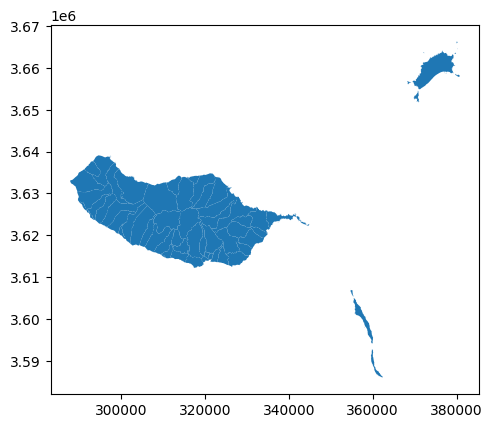

In [ ]:
mapa_madeira.plot()

# **I-PRE-PROCESSAMENTO**

## **INDICADORES**

In [ ]:
#criação de uma lista de indicadores compósitos
indicators_list = ['IVolumetria',
                   'IMédia_edif',
                   'dimensao_aloj',
                   'ind_envelhecimento',
                   "ind_qualificações",
                   'pop_emp']


In [ ]:
#Índice de volumetria do edificado (número de médio de pisos por unidade territorial)
total_edificios = (df_BGRI.N_EDIFICIOS_1OU2_PISOS)+(df_BGRI.N_EDIFICIOS_3OU4_PISOS)+(df_BGRI.N_EDIFICIOS_5OU_MAIS_PISOS)
volumetria = ((df_BGRI.N_EDIFICIOS_1OU2_PISOS*1.5)+(df_BGRI.N_EDIFICIOS_3OU4_PISOS*3.5)+(df_BGRI.N_EDIFICIOS_5OU_MAIS_PISOS*7))
df_BGRI["IVolumetria"] = volumetria/total_edificios
df_BGRI["IVolumetria"]

0       1.519608
1       1.674216
2       1.670296
3       2.016069
4       1.627551
          ...   
4255    1.500000
4256    1.523810
4257    1.500000
4258    1.567708
4259    1.522099
Name: IVolumetria, Length: 4260, dtype: float64

In [ ]:
#média de anos do edificado (idade média do edificado por unidade territorial)
total_edificios = (df_BGRI.N_EDIFICIOS_CONSTR_ANTES_1919)+(df_BGRI.N_EDIFICIOS_CONSTR_1919A1945)+(df_BGRI.N_EDIFICIOS_CONSTR_1946A1960)+(df_BGRI.N_EDIFICIOS_CONSTR_1961A1970)+(df_BGRI.N_EDIFICIOS_CONSTR_1971A1980)+(df_BGRI.N_EDIFICIOS_CONSTR_1981A1990)+(df_BGRI.N_EDIFICIOS_CONSTR_1991A1995)+(df_BGRI.N_EDIFICIOS_CONSTR_1996A2000)+(df_BGRI.N_EDIFICIOS_CONSTR_2001A2005)+(df_BGRI.N_EDIFICIOS_CONSTR_2006A2011)
df_BGRI['IMédia_edif'] = (((2011-1910)*df_BGRI.N_EDIFICIOS_CONSTR_ANTES_1919)+((2011-1932)*df_BGRI.N_EDIFICIOS_CONSTR_1919A1945)+((2011-1953)*df_BGRI.N_EDIFICIOS_CONSTR_1946A1960)+((2011-1965.5)*df_BGRI.N_EDIFICIOS_CONSTR_1961A1970)+((2011-1975.5)*df_BGRI.N_EDIFICIOS_CONSTR_1971A1980)+((2011-1985.5)*df_BGRI.N_EDIFICIOS_CONSTR_1981A1990)+((2011-1993)*df_BGRI.N_EDIFICIOS_CONSTR_1991A1995)+((2011-1998)*df_BGRI.N_EDIFICIOS_CONSTR_1996A2000)+((2011-2003)*df_BGRI.N_EDIFICIOS_CONSTR_2001A2005)+((2011-2008.5)*df_BGRI.N_EDIFICIOS_CONSTR_2006A2011))/total_edificios
df_BGRI['IMédia_edif']

0       43.191176
1       30.558362
2       35.484574
3       39.111047
4       32.311224
          ...    
4255    30.346939
4256    72.267857
4257    33.165854
4258    46.652344
4259    71.546961
Name: IMédia_edif, Length: 4260, dtype: float64

In [ ]:
#dimensão média dos alojamentos (dimensão média dos alojamentos em metros quadrados por unidade territorial)
total_edificios = (df_BGRI.N_RES_HABITUAL_AREA_50)+(df_BGRI.N_RES_HABITUAL_AREA_50_100)+(df_BGRI.N_RES_HABITUAL_AREA_100_200)+(df_BGRI.N_RES_HABITUAL_AREA_200)
dimensao = ((df_BGRI.N_RES_HABITUAL_AREA_50*25)+(df_BGRI.N_RES_HABITUAL_AREA_50_100*75)+(df_BGRI.N_RES_HABITUAL_AREA_100_200*150)+(df_BGRI.N_RES_HABITUAL_AREA_200*300))
df_BGRI["dimensao_aloj"]=dimensao/total_edificios
df_BGRI["dimensao_aloj"]

0       133.561644
1       144.916143
2       148.231623
3       133.141806
4       155.508475
           ...    
4255     61.000000
4256    102.551020
4257    104.629630
4258    119.270833
4259    106.980519
Name: dimensao_aloj, Length: 4260, dtype: float64

In [ ]:
#Indice de envelhecimento = [pop com mais de 65 anos / pop até 20 anos]*100
df_BGRI["ind_envelhecimento"]= (df_BGRI.N_INDIVIDUOS_RESIDENT_65)/(df_BGRI.N_INDIVIDUOS_RESIDENT_0A4+df_BGRI.N_INDIVIDUOS_RESIDENT_5A9+df_BGRI.N_INDIVIDUOS_RESIDENT_10A13+df_BGRI.N_INDIVIDUOS_RESIDENT_14A19)*100
df_BGRI["ind_envelhecimento"]

0       196.296296
1       136.956522
2        82.629674
3        96.422101
4       114.242424
           ...    
4255     94.117647
4256     86.666667
4257    136.619718
4258     83.742331
4259     88.750000
Name: ind_envelhecimento, Length: 4260, dtype: float64

In [ ]:
#indice de qualificação (número de anos de escolaridade da população)
total_população=(df_BGRI.N_IND_RESIDENT_ENSINCOMP_1BAS)+(df_BGRI.N_IND_RESIDENT_ENSINCOMP_2BAS)+(df_BGRI.N_IND_RESIDENT_ENSINCOMP_3BAS)+(df_BGRI.N_IND_RESIDENT_ENSINCOMP_SEC)+(df_BGRI.N_IND_RESIDENT_ENSINCOMP_POSEC)+(df_BGRI.N_IND_RESIDENT_ENSINCOMP_SUP)
anos_escolaridade=(df_BGRI.N_IND_RESIDENT_ENSINCOMP_1BAS*4)+(df_BGRI.N_IND_RESIDENT_ENSINCOMP_2BAS*6)+(df_BGRI.N_IND_RESIDENT_ENSINCOMP_3BAS*9)+(df_BGRI.N_IND_RESIDENT_ENSINCOMP_SEC*12)+(df_BGRI.N_IND_RESIDENT_ENSINCOMP_POSEC*12)+(df_BGRI.N_IND_RESIDENT_ENSINCOMP_SUP*14)
df_BGRI["ind_qualificações"]=anos_escolaridade/total_população
df_BGRI["ind_qualificações"]

0       6.415033
1       7.437613
2       7.457276
3       8.244334
4       7.448346
          ...   
4255    6.327586
4256    6.836538
4257    6.308725
4258    7.667127
4259    7.034985
Name: ind_qualificações, Length: 4260, dtype: float64

In [ ]:
#população empregada
total_emprego=df_BGRI["N_IND_RESID_EMPREGADOS"]

#população total
total_população= df_BGRI["N_INDIVIDUOS_RESIDENT"]

#percentagem da população empregada
df_BGRI["pop_emp"]=(df_BGRI["N_IND_RESID_EMPREGADOS"]/df_BGRI["N_INDIVIDUOS_RESIDENT"])*100
df_BGRI["pop_emp"]

0       35.120643
1       44.792425
2       47.520558
3       44.667724
4       44.008715
          ...    
4255    42.857143
4256    36.718750
4257    32.033426
4258    46.666667
4259    55.116279
Name: pop_emp, Length: 4260, dtype: float64

## **SELEÇÃO DA AMOSTRA**


Criar um *subset* da base de dados inicial, que tem uma desagregação territorial a 8 níveis (NUTS 0; NUTS 1, NUTS 2, NUTS 3, concelhos, freguesias, secções e subsecções)

In [ ]:
df_BGRI['NUTSII_DSG'].unique()

array(['CENTRO', 'NORTE', 'ALENTEJO', 'ALGARVE', 'LISBOA',
       'REGIÃO AUTÓNOMA DA MADEIRA', 'REGIÃO AUTÓNOMA DOS AÇORES'],
      dtype=object)

In [ ]:
#seleção da base de dados (subset) --> neste caso para os municípios
df_BGRI_s = df_BGRI[df_BGRI["NUTSII_DSG"]=="REGIÃO AUTÓNOMA DA MADEIRA"]

In [ ]:
df_BGRI_s.shape

(54, 149)

##**Indicadores Madeira**


In [ ]:
df_BGRI_s["IVolumetria"]

4050    1.700494
4051    1.856139
4052    1.661389
4053    1.656205
4054    1.815217
4055    2.011848
4056    1.565359
4057    1.533477
4058    2.058664
4059    1.815205
4060    1.857648
4061    1.732360
4062    1.800671
4063    1.908302
4064    1.707792
4065    2.018607
4066    1.829201
4067    1.858818
4068    1.819185
4069    2.706777
4070    2.081796
4071    1.813046
4072    3.510092
4073    2.035548
4074    1.684524
4075    1.740038
4076    1.820136
4077    1.693548
4078    1.779006
4079    1.602740
4080    1.844952
4081    1.585561
4082    1.731913
4083    2.000000
4084    2.019465
4085    2.179552
4086    1.885395
4087    2.133895
4088    1.883602
4089    1.631198
4090    2.283301
4091    1.824039
4092    1.814421
4093    1.570312
4094    1.831288
4095    1.676534
4096    1.640976
4097    1.615274
4098    1.605263
4099    1.542105
4100    1.682208
4101    1.545356
4102    1.610338
4103    1.574940
Name: IVolumetria, dtype: float64

In [ ]:
df_BGRI_s['IMédia_edif']

4050    35.816237
4051    38.743128
4052    28.279877
4053    30.849501
4054    21.507246
4055    17.723934
4056    33.614379
4057    25.277538
4058    37.648796
4059    29.979467
4060    32.564839
4061    38.726277
4062    30.480999
4063    50.251876
4064    31.109718
4065    45.531898
4066    45.432507
4067    35.840833
4068    36.005888
4069    34.866930
4070    53.987282
4071    33.324983
4072    58.076147
4073    25.172494
4074    24.177871
4075    33.079815
4076    37.056938
4077    31.196481
4078    32.152762
4079    30.970890
4080    43.822770
4081    27.235294
4082    28.656591
4083    36.884259
4084    22.509732
4085    38.428535
4086    33.610137
4087    29.441948
4088    46.244510
4089    33.490496
4090    26.230703
4091    27.913914
4092    32.936396
4093    35.132812
4094    42.067485
4095    41.211518
4096    27.020296
4097    35.899616
4098    40.584211
4099    30.605263
4100    29.304930
4101    32.757019
4102    31.109592
4103    23.511281
Name: IMédia_edif, dtype: fl

In [ ]:
df_BGRI_s["dimensao_aloj"]

4050    123.883538
4051    114.922145
4052    117.975207
4053    123.209549
4054    142.469880
4055    128.413284
4056    125.282486
4057    137.545455
4058    111.328279
4059     88.960546
4060    101.277432
4061     96.036107
4062     82.139279
4063    108.125791
4064    131.234808
4065    119.920844
4066    121.047756
4067    109.072984
4068    125.918933
4069    114.596273
4070    104.882604
4071    121.558672
4072    113.205013
4073    112.441725
4074    121.057118
4075    119.784746
4076    112.459979
4077    118.560606
4078    116.509804
4079    107.047872
4080    110.168196
4081     96.538462
4082    102.905199
4083    129.126214
4084    167.060086
4085    113.739669
4086    111.857578
4087    103.232190
4088    102.442159
4089     99.115516
4090    121.986488
4091    146.616541
4092    123.641525
4093    121.417683
4094    109.203297
4095     94.651540
4096    111.269644
4097    115.831919
4098     92.228464
4099    127.522936
4100     92.585170
4101    118.725296
4102    130.

In [ ]:
df_BGRI_s["ind_envelhecimento"]

4050     95.151515
4051    106.379822
4052    110.543131
4053    168.354430
4054    193.333333
4055     73.575130
4056    129.946524
4057    132.352941
4058     28.000740
4059     51.948052
4060     35.935936
4061     50.519031
4062     50.582751
4063    122.531160
4064    110.428456
4065    137.706511
4066    115.712495
4067     48.491952
4068    102.246321
4069     53.480682
4070    121.028037
4071     69.809428
4072    136.637931
4073     45.959596
4074     33.364929
4075     69.224248
4076    110.909091
4077     81.845238
4078     66.634241
4079    107.692308
4080     78.301016
4081    200.000000
4082    147.330961
4083    194.594595
4084    109.160305
4085     57.533040
4086     67.721912
4087    112.844037
4088     79.470199
4089     52.556002
4090     26.067453
4091     63.343718
4092     67.832168
4093     82.439024
4094    179.310345
4095    132.394366
4096    109.331260
4097    153.207547
4098    111.188811
4099    200.000000
4100    147.247706
4101    125.210084
4102    101.

In [ ]:
df_BGRI_s["ind_qualificações"]

4050    7.311269
4051    7.660538
4052    7.058673
4053    6.423394
4054    7.704142
4055    6.539244
4056    6.197512
4057    6.778409
4058    7.158071
4059    5.838736
4060    6.827960
4061    6.565949
4062    6.494040
4063    8.404592
4064    7.710758
4065    9.030117
4066    8.342709
4067    7.849909
4068    7.784499
4069    9.039317
4070    8.619473
4071    7.736615
4072    9.794627
4073    7.747877
4074    6.612678
4075    7.340553
4076    7.044717
4077    6.807018
4078    6.750272
4079    7.463235
4080    7.476809
4081    6.165049
4082    6.567545
4083    6.384615
4084    7.061966
4085    7.114127
4086    7.439140
4087    6.683908
4088    6.925280
4089    7.135295
4090    9.084303
4091    7.970801
4092    7.808381
4093    7.252113
4094    6.789137
4095    6.872021
4096    7.329507
4097    6.778325
4098    6.576642
4099    6.088542
4100    6.433890
4101    7.002854
4102    7.140027
4103    8.040880
Name: ind_qualificações, dtype: float64

In [ ]:
df_BGRI_s["pop_emp"]

4050    35.353535
4051    36.041733
4052    35.843186
4053    29.608939
4054    33.823529
4055    26.865672
4056    27.612761
4057    34.801136
4058    38.190815
4059    30.384808
4060    37.851787
4061    38.970939
4062    34.249471
4063    40.969873
4064    39.859722
4065    39.754518
4066    39.776812
4067    42.760107
4068    37.331107
4069    46.514614
4070    40.822219
4071    41.076185
4072    41.528614
4073    39.482334
4074    33.333333
4075    38.397299
4076    33.038121
4077    37.847866
4078    34.120456
4079    35.465116
4080    38.212803
4081    35.220126
4082    41.486811
4083    28.508772
4084    31.554878
4085    37.843736
4086    38.221008
4087    30.028599
4088    32.006920
4089    40.394684
4090    51.099795
4091    41.757696
4092    42.926357
4093    41.132479
4094    34.382567
4095    32.546267
4096    38.992366
4097    29.803123
4098    33.695652
4099    34.117647
4100    28.091728
4101    35.069699
4102    34.374004
4103    43.133321
Name: pop_emp, dtype: float6

# **II-ANÁLISE MULTIVARIADAS DE DADOS**

Consideramos os seguinte seis indicadores socio-económicos:

       
  * i) Indice de Volumetia

  * ii) Idade Média do Edificado

  * iii) Dimensão do Alojamento

  * iv) Indice de Qualificações

  * v) Indice de Envelhecimento
  
  * vi) População empregada (%)

##**REDUÇÃO DA DIMENSIONALIDADE**:

Nesta parte do trabalho, vamos construir novos indicadores de modo a analisar as dimensões fundamentais da Região Autónoma da Madeira, recorrendo para o efeito a uma análise fatorial de componentes principais (ACP). Vamos explorar a matriz de correlação, teste KMO, comunalidades, variância explicada, loadings (rodados) e scores.


Começamos, então, por analisar a matriz de correlação entre todos os indicadores previamente calculados.


###**Matriz de Correlação**

Uma matriz de correlação é uma tabela que mostra o grau de associação entre variáveis, variando de -1 a 1, onde 1 indica correlação positiva forte, -1 indica correlação negativa forte e 0 indica pouca ou nenhuma correlação. É usada para analisar relações entre variáveis em dados.

Text(0.5, 1.0, 'Correlation between different indicadors')

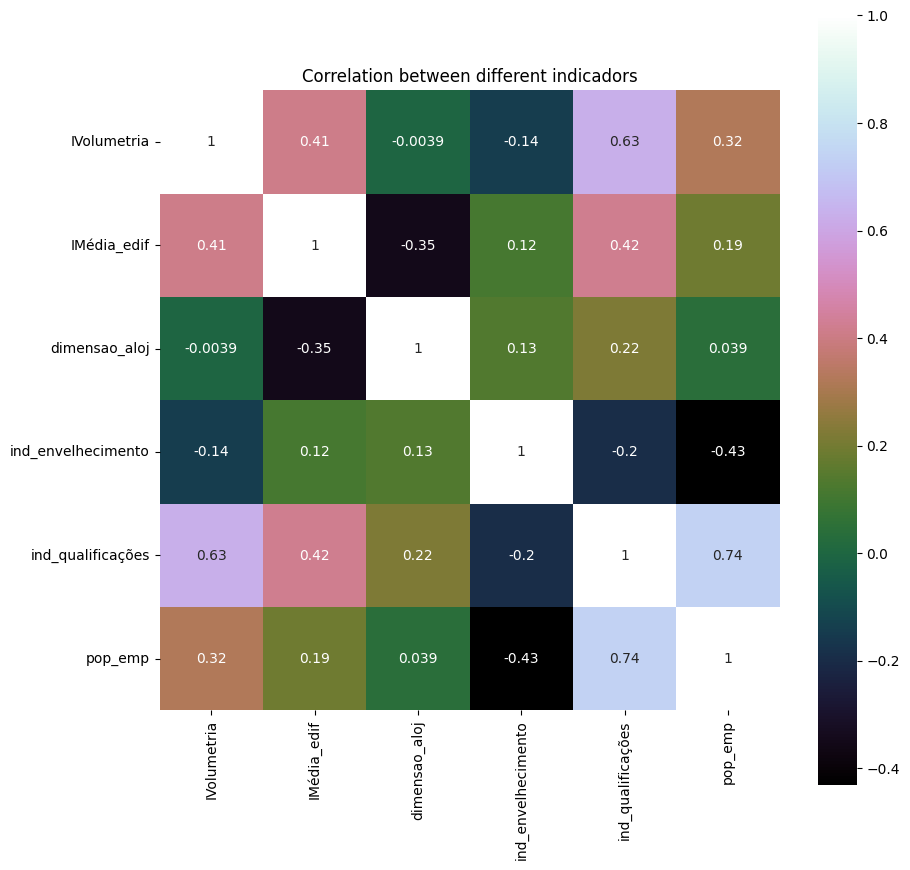

In [ ]:
correlation = df_BGRI_s[indicators_list].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, square = True, annot = True, cmap='cubehelix')
plt.title('Correlation between different indicadors')

A correlação mais forte é entre o Índice de Qualificações e a Percentagem de População Empregada com uma correlação positiva forte de 0.74.

Índice de Volumetria do Edificado tem correlações moderadas e relevantes com a Idade Média do Edificado e o Índice de Qualificação, de 0.42 e 0.63, respectivamente.


A Dimensão Média dos Alojamentos tem correlações fracas com várias variáveis, e não parece ter uma relação forte e relevante com nenhuma delas. Tem até a correlação mais fraca da matriz, de 0.0039, com o Índice de Volumetria.


###**KMO**

O teste Kaiser-Meyer-Olkin (KMO) é uma medida que ajuda a determinar se os dados que temos são apropriados para análise fatorial. É uma forma de avaliar se os dados têm estrutura suficiente para permitir a identificação de padrões subjacentes. Um valor de KMO mais alto indica que os dados são mais adequados para a análise fatorial, com valores acima de 0,6 geralmente considerados aceitáveis.

In [ ]:
#KMO Aplication
kmo_all,kmo_model=calculate_kmo(df_BGRI_s[indicators_list])
kmo_model

0.46444638198010957

O valor do teste devia ser superior a 0.6, mas como não se verifica, vamos proceder à normalização dos dados.

In [ ]:
# Criar DataFrame com as colunas que queremos normalizar
df_to_normalize = df_BGRI_s[['IVolumetria',
                   'IMédia_edif',
                   'dimensao_aloj',
                   'ind_envelhecimento',
                   "ind_qualificações",
                   'pop_emp']]

# Fazer a normalização
df_normalized = (df_to_normalize - df_to_normalize.mean()) / df_to_normalize.std()

df_normalized

,IVolumetria,IMédia_edif,dimensao_aloj,ind_envelhecimento,ind_qualificações,pop_emp
4050,-0.442463,0.229041,0.538342,-0.114566,0.045707,-0.251797
4051,0.049508,0.598358,-0.051251,0.129141,0.466121,-0.112522
4052,-0.566067,-0.721902,0.149618,0.219504,-0.258343,-0.152703
4053,-0.582452,-0.397665,0.493998,1.474280,-1.023028,-1.414370
4054,-0.079840,-1.576476,1.761184,2.016439,0.518607,-0.561435
4055,0.541680,-2.053857,0.836365,-0.582875,-0.883579,-1.969543
4056,-0.869601,-0.048791,0.630382,0.640648,-1.294922,-1.818350
4057,-0.970376,-1.100739,1.437194,0.692879,-0.595696,-0.363590
4058,0.689655,0.460275,-0.287700,-1.572052,-0.138698,0.322403
4059,-0.079878,-0.507446,-1.759329,-1.052284,-1.726779,-1.257352


In [ ]:
#KMO Aplication
kmo_all,kmo_model=calculate_kmo(df_normalized[indicators_list])
kmo_model

0.4644463819801094

###**Comumalidades**

Comunalidades representam o quanto a variância de uma variável original é explicada pelos fatores em análise fatorial, variando de 0 a 1. Valores próximos de 0 indicam que os fatores explicam pouco da variável, enquanto valores próximos de 1 mostram que os fatores explicam a maioria ou toda a variância. Em resumo, as comunalidades destacam o papel de cada variável na análise fatorial.

In [ ]:
# Para calcular as comunalidades
fa = FactorAnalyzer(method = 'principal', rotation= 'varimax')
fa.fit(df_normalized[indicators_list])

# Obter comunalidades
communalities = fa.get_communalities()

# Criar DataFrame para melhor visualização
communalities_df = pd.DataFrame({
    'Variable': indicators_list,
    'Communality': communalities
})

print(communalities_df)

             Variable  Communality
0         IVolumetria     0.634504
1         IMédia_edif     0.840861
2       dimensao_aloj     0.924987
3  ind_envelhecimento     0.868578
4   ind_qualificações     0.921601
5             pop_emp     0.779683


A Dimensão Média dos Alojamentos e o Índice de Qualificação têm comunalidades próximas de 1, sendo altamente relevantes e bem explicadas pelos componentes principais.

Por outro lado, o Índice de Volumetria tem a comunalidade mais baixa, sugerindo que os fatores explicam menos da sua variância, tornando-a menos relevante na análise.

###**Variância Explicada**

A variância explicada indica a proporção da variabilidade total nos dados que é explicada por uma componente principal o fator.

As componentes principais são combinações lineares das variáveis originais que são ordenadas de acordo com a quantidade de variância que explicam nos dados. A 1ª componente principal explica a maior parte da variabilidade, a 2ª componente principal explica a segunda maior parte e assim sucessivamente.

Normalmente, a variância explicada é resumida num "scree plot", que dá uma ideia gráfica da magnitude dos valores próprios (corresponde à variância total explicada por cada componente/fator) e ajuda a estimar o número mínimo de fatores após os quais há uma "suavização" do gráfico.

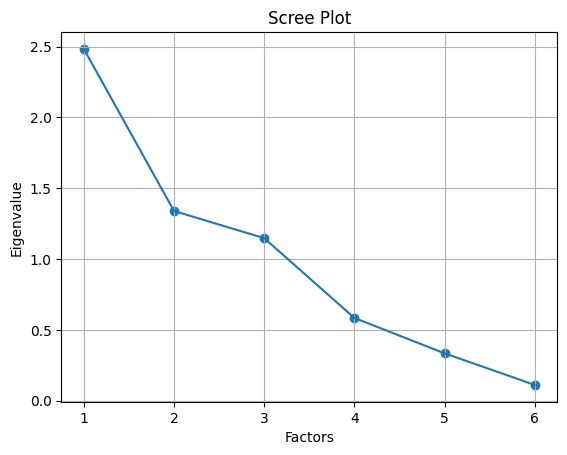

In [ ]:
# Extrair valores próprios e criar Scree Plot
eigen_values, vectors = fa.get_eigenvalues()
plt.scatter(range(1,df_normalized[indicators_list].shape[1]+1),eigen_values)
plt.plot(range(1,df_normalized[indicators_list].shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

A análise gráfica leva-nos a escolher 3 fatores pois, usualmente, o valor próprio tem que ser superior a 1.

Assim sendo, vamos proceder ao cálculo das variâncias explicadas e cumulativas para confirmar a nossa escolha.

In [ ]:
# Para calcular variâncias explicadas
tot = sum(eigen_values)
var_exp = [(i / tot)*100 for i in sorted(eigen_values,reverse=True)]

# Calcular variância explicada cumulativa
cum_var_exp = [sum(var_exp[:i+1]) for i in range(len(var_exp))]

# Criar DataFrame para melhor visualização
explained_var_df = pd.DataFrame({
    'Component': [f'Component {i+1}' for i in range(len(var_exp))],
    'Explained Variance': var_exp,
    'Cumulative Explained Variance': cum_var_exp
})

print(explained_var_df)


     Component  Explained Variance  Cumulative Explained Variance
0  Component 1           41.393286                      41.393286
1  Component 2           22.320483                      63.713769
2  Component 3           19.123138                      82.836907
3  Component 4            9.737308                      92.574214
4  Component 5            5.571795                      98.146010
5  Component 6            1.853990                     100.000000


Uma vez que com 3 fatores a variância cumulativa é de, aproximadamente, 83%, confirma-se a nossa escolha.

###**Loadings (rodados)**

Os loadings são coeficientes que indicam a contribuição de cada variável original para as componentes principais extraídas e descrevem as relações lineares entre as variáveis originais e os componentes principais.

Os loadings podem ser calculados de 2 maneiras diferentes: com rotação e com rotação. A rotação varimax é umas técnicas de rotação mais comuns e facilita a interpretação das componentes principais, tornando os loadings mais simples e fáceis de interpretar. Procedemos, então, à extração dos fatores com a rotação varimax.

Além disso, é de notar também que: suponham-se duas variáveis X_1 e X_2 e duas componentes principais, PC_1 e PC_2. Se X_1 tiver um loading positivo elevado em PC_1, então X_1 está fortemente associado a PC_1 e as variações em X_1 têm um grande impacto na variabilidade de PC_1.

In [ ]:

# Extração do fator com rotação Varimax
fa_rot = FactorAnalyzer(n_factors=3, rotation='varimax', method='principal')
fa_rot.fit(df_normalized[indicators_list])


# Obtenção dos loadings
loadings_rot = fa_rot.loadings_  # The underscore is a naming convention to help differentiate between parameters that are set during initialization and attributes that are learned from the data


# Criação de DataFrame para melhor visualização
loadings_rot_df = pd.DataFrame(loadings_rot, columns=[f'Factor {i+1}' for i in range(3)], index=indicators_list)

# Destacar pesos diferentes

def highlight_weights(val):
    color = 'red' if abs(val) > 0.7 else ('orange' if abs(val) > 0.5 else 'black')
    return f'color: {color}'

styled_df = loadings_rot_df.style.applymap(highlight_weights)

styled_df

,Factor 1,Factor 2,Factor 3
IVolumetria,0.792838,-0.068174,-0.035548
IMédia_edif,0.665489,-0.570716,0.268831
dimensao_aloj,0.100556,0.948198,0.125679
ind_envelhecimento,-0.022514,0.105073,0.925759
ind_qualificações,0.906777,0.199357,-0.244160
pop_emp,0.615522,0.111413,-0.623220


É importante referir, primeiramente, que um loading perto de 1 indica uma relação positiva entre a variável original e a componente principal (a variável original está fortemente associada ao fator correspondente); perto de 0 indica que a variável original não contribui significativamente para o fator; já próximo de -1, significa que existe uma relação negativa entre a variável original e o correspondente fator.

Posto isto, pela observação da tabela, podemos concluir que o Índice de Volumetria e Índice de Qualificação estão fortemente associados ao Fator 1, a variável Dimensão do Alojamento está fortemente associada ao Fator 2 e, finalmente, ao Fator 3 é a variável Índice de Envelhecimento.

De notar que, de entre os 3 fatores, o Fator 1 é o que associa melhor a Idade Média do Edificado e a População Empregada às respetivas componentes principais.


###**scores**

Os scores são os valores das observações expressos em termos das componentes principais, isto é, representam as projeções das observações no espaço definido pelas componentes principais.

In [ ]:
scores = fa.transform(df_normalized[indicators_list])
scores

array([[-0.07680952,  0.29531625,  0.11935797],
       [ 0.39699486, -0.19395968,  0.28977985],
       [-0.53886461,  0.38839055, -0.01471275],
       [-0.7786147 ,  0.42056239,  1.5470874 ],
       [ 0.00752224,  2.26806084,  1.45662191],
       [-1.22945913,  1.05988476, -0.05118393],
       [-1.05924135,  0.20167619,  1.20507857],
       [-0.78927952,  1.50209829,  0.47012488],
       [ 0.16546096, -0.61036954, -1.09698523],
       [-1.47633419, -1.66748732, -0.64215839],
       [-0.50358424, -0.88886088, -1.28145864],
       [-0.46136499, -1.45827007, -0.99316752],
       [-1.05270116, -1.82363355, -1.04700557],
       [ 1.5052841 , -0.83910695,  0.49737159],
       [ 0.20317721,  1.10901314, -0.10340535],
       [ 1.81513514,  0.13869299,  0.78142467],
       [ 1.19985686,  0.00502392,  0.41630586],
       [ 0.4194993 , -0.3290537 , -1.31005781],
       [ 0.41314607,  0.53468041,  0.12005639],
       [ 2.14512722,  0.27262429, -1.2980752 ],
       [ 1.93681857, -1.16530391,  0.632

In [ ]:
#to set the scores as columns for each observation in the  datafaframe
def set_scores_factors(dataframe, scores):
  for i in list(range(len(scores[0]))):
    serie_factor = []
    for e in scores:
      serie_factor.append(e[i])
    dataframe["factor_{}".format(i+1)] = pd.Series(serie_factor,dataframe.index)
  return dataframe

# Adicione a coluna 'CONCELHO_DSG' ao DataFrame 'df_normalized'
df_CONCELHO_DSG = pd.read_csv("BGRI2011_PT_FREG.csv")
df_normalized['CONCELHO_DSG'] = df_CONCELHO_DSG['CONCELHO_DSG']

df_normalized = set_scores_factors(df_normalized, scores)
df_normalized

<ipython-input-35-8db334e2d777>:11: DtypeWarning: Columns (135) have mixed types. Specify dtype option on import or set low_memory=False.
  df_CONCELHO_DSG = pd.read_csv("BGRI2011_PT_FREG.csv")


,IVolumetria,IMédia_edif,dimensao_aloj,ind_envelhecimento,ind_qualificações,pop_emp,CONCELHO_DSG,factor_1,factor_2,factor_3
4050,-0.442463,0.229041,0.538342,-0.114566,0.045707,-0.251797,CALHETA,-0.076810,0.295316,0.119358
4051,0.049508,0.598358,-0.051251,0.129141,0.466121,-0.112522,CALHETA,0.396995,-0.193960,0.289780
4052,-0.566067,-0.721902,0.149618,0.219504,-0.258343,-0.152703,CALHETA,-0.538865,0.388391,-0.014713
4053,-0.582452,-0.397665,0.493998,1.474280,-1.023028,-1.414370,CALHETA,-0.778615,0.420562,1.547087
4054,-0.079840,-1.576476,1.761184,2.016439,0.518607,-0.561435,CALHETA,0.007522,2.268061,1.456622
4055,0.541680,-2.053857,0.836365,-0.582875,-0.883579,-1.969543,CALHETA,-1.229459,1.059885,-0.051184
4056,-0.869601,-0.048791,0.630382,0.640648,-1.294922,-1.818350,CALHETA,-1.059241,0.201676,1.205079
4057,-0.970376,-1.100739,1.437194,0.692879,-0.595696,-0.363590,CALHETA,-0.789280,1.502098,0.470125
4058,0.689655,0.460275,-0.287700,-1.572052,-0.138698,0.322403,CÂMARA DE LOBOS,0.165461,-0.610370,-1.096985
4059,-0.079878,-0.507446,-1.759329,-1.052284,-1.726779,-1.257352,CÂMARA DE LOBOS,-1.476334,-1.667487,-0.642158


In [ ]:
# creation of an array of factor scores
factor_list = ['factor_1', 'factor_2', 'factor_3']
df_normalized[factor_list]

,factor_1,factor_2,factor_3
4050,-0.076810,0.295316,0.119358
4051,0.396995,-0.193960,0.289780
4052,-0.538865,0.388391,-0.014713
4053,-0.778615,0.420562,1.547087
4054,0.007522,2.268061,1.456622
4055,-1.229459,1.059885,-0.051184
4056,-1.059241,0.201676,1.205079
4057,-0.789280,1.502098,0.470125
4058,0.165461,-0.610370,-1.096985
4059,-1.476334,-1.667487,-0.642158


Procedemos à realização de boxplots para cada um dos 3 fatores, de modo a identificar a presença de outliers e visualizar a dispersão em torno da mediana.

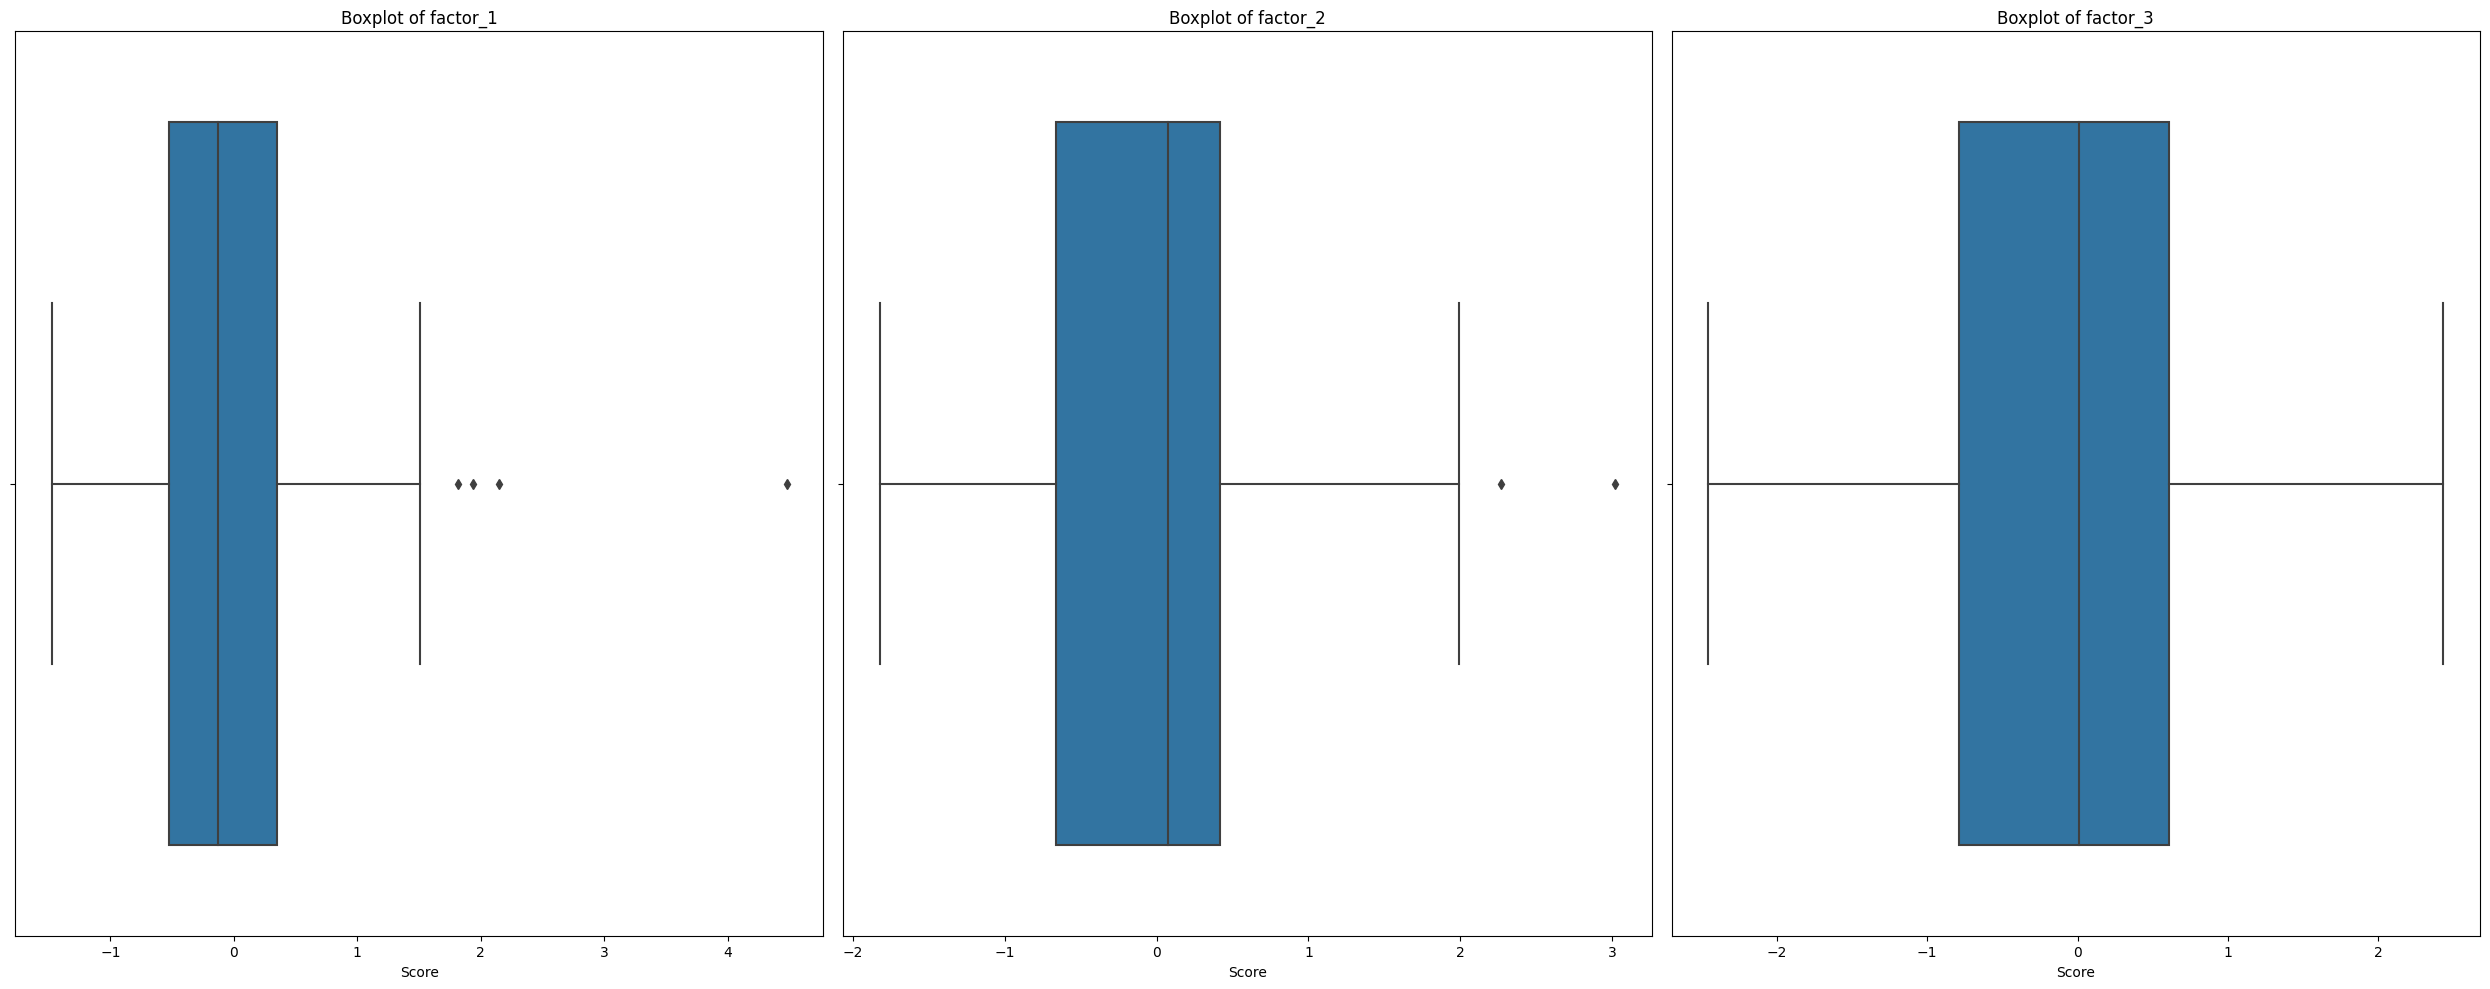

In [ ]:
fig, axes = plt.subplots(1, len(factor_list), figsize=(25, 10))

# Loop through each factor to create the plots
for i, factor in enumerate(factor_list):
    # Boxplot
    sns.boxplot(x=df_normalized[factor], ax=axes[ i])
    axes[i].set_title(f'Boxplot of {factor}')
    axes[i].set_xlabel('Score')

plt.tight_layout()
plt.show()

Pela análise dos boxplots, percebe-se a presença de outliers superiores no caso do Fator 1 e de outliers superiores e inferiores no caso do Fator 3. No boxplot referente ao Fator 2, não existem outliers. É de notar também que a mediana, nos 3 casos, encontra-se em torno de 0.

Procedemos, em seguida, à construção da matriz de correlação entre fatores, por meio de um "Heatmap" (representação gráfica de dados que utiliza cores para representar valores numa matriz de duas dimensões).

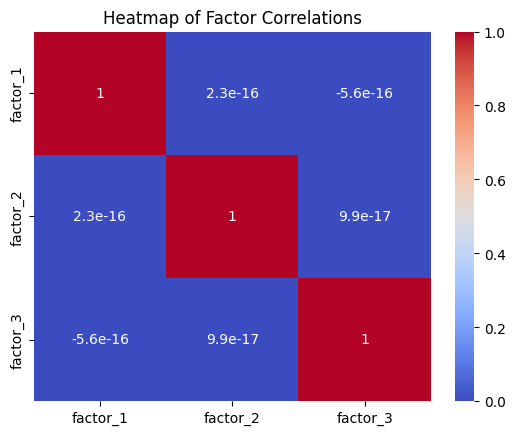

In [ ]:
#correlation between factor
correlation_matrix = df_normalized[factor_list].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Factor Correlations')
plt.show()

Concluímos que a correlação é praticamente nula entre os 3 fatores.

##**CLASSIFICAÇÃO**:

Nesta questão, iremos construir grupos semelhantes de unidades territoriais da Região Autónoma da Madeira, com base nos outputs dos indicadores da questão anterior.

####Freguesias numeradas

De modo a simplificar a análise do dendrograma realizado a seguir, elaboramos uma lista que associa cada freguesia ao respetivo número representado no dendrograma, numerados de 0 a 53.

In [ ]:
#Lista existente df_BGRI_s["GEO_COD_DSG"]
lista_existente = df_BGRI_s["GEO_COD_DSG"]

#Lista de números de 0 a 53
lista_numeros = list(range(0, 54))

#Criar um DataFrame a partir das duas listas
df_1 = pd.DataFrame({'Números': lista_numeros,'GEO_COD_DSG': lista_existente})

#Agora, o DataFrame df contém as duas colunas
print(df_1)

      Números                  GEO_COD_DSG
4050        0              Arco da Calheta
4051        1        Calheta (R.A.Madeira)
4052        2          Estreito da Calheta
4053        3               Fajã da Ovelha
4054        4                Jardim do Mar
4055        5                  Paul do Mar
4056        6               Ponta do Pargo
4057        7                     Prazeres
4058        8              Câmara de Lobos
4059        9           Curral das Freiras
4060       10  Estreito de Câmara de Lobos
4061       11                Quinta Grande
4062       12              Jardim da Serra
4063       13   Imaculado Coração de Maria
4064       14                        Monte
4065       15        Funchal (Santa Luzia)
4066       16  Funchal (Santa Maria Maior)
4067       17                Santo António
4068       18                  São Gonçalo
4069       19                 São Martinho
4070       20          Funchal (São Pedro)
4071       21                    São Roque
4072       

###**Clustering Hierárquico - Dendrograma: Indicadores**

Os métodos hierárquicos envolvem uma abordagem hierárquica, onde os elemento são agrupados sucessivamente para formar uma hierarquia de grupos; o dendrograma é um exemplo de método hierárquico. Os métodos não hierárquicos não seguem uma abordagem hierárquica e envolvem uma única divisão dos elementos em grupos; k-means são um exemplo desse tipo de método.

Dentro destes dois métodos, escolhemos os métodos hierárquicos, o que nos levou à realização de dendrogramas (para os indicadores e para os fatores) que é usado para visualizar a estrutura hierárquica dos cluster formados a partir do conjunto de dados.

####**Mapas por indicadores**

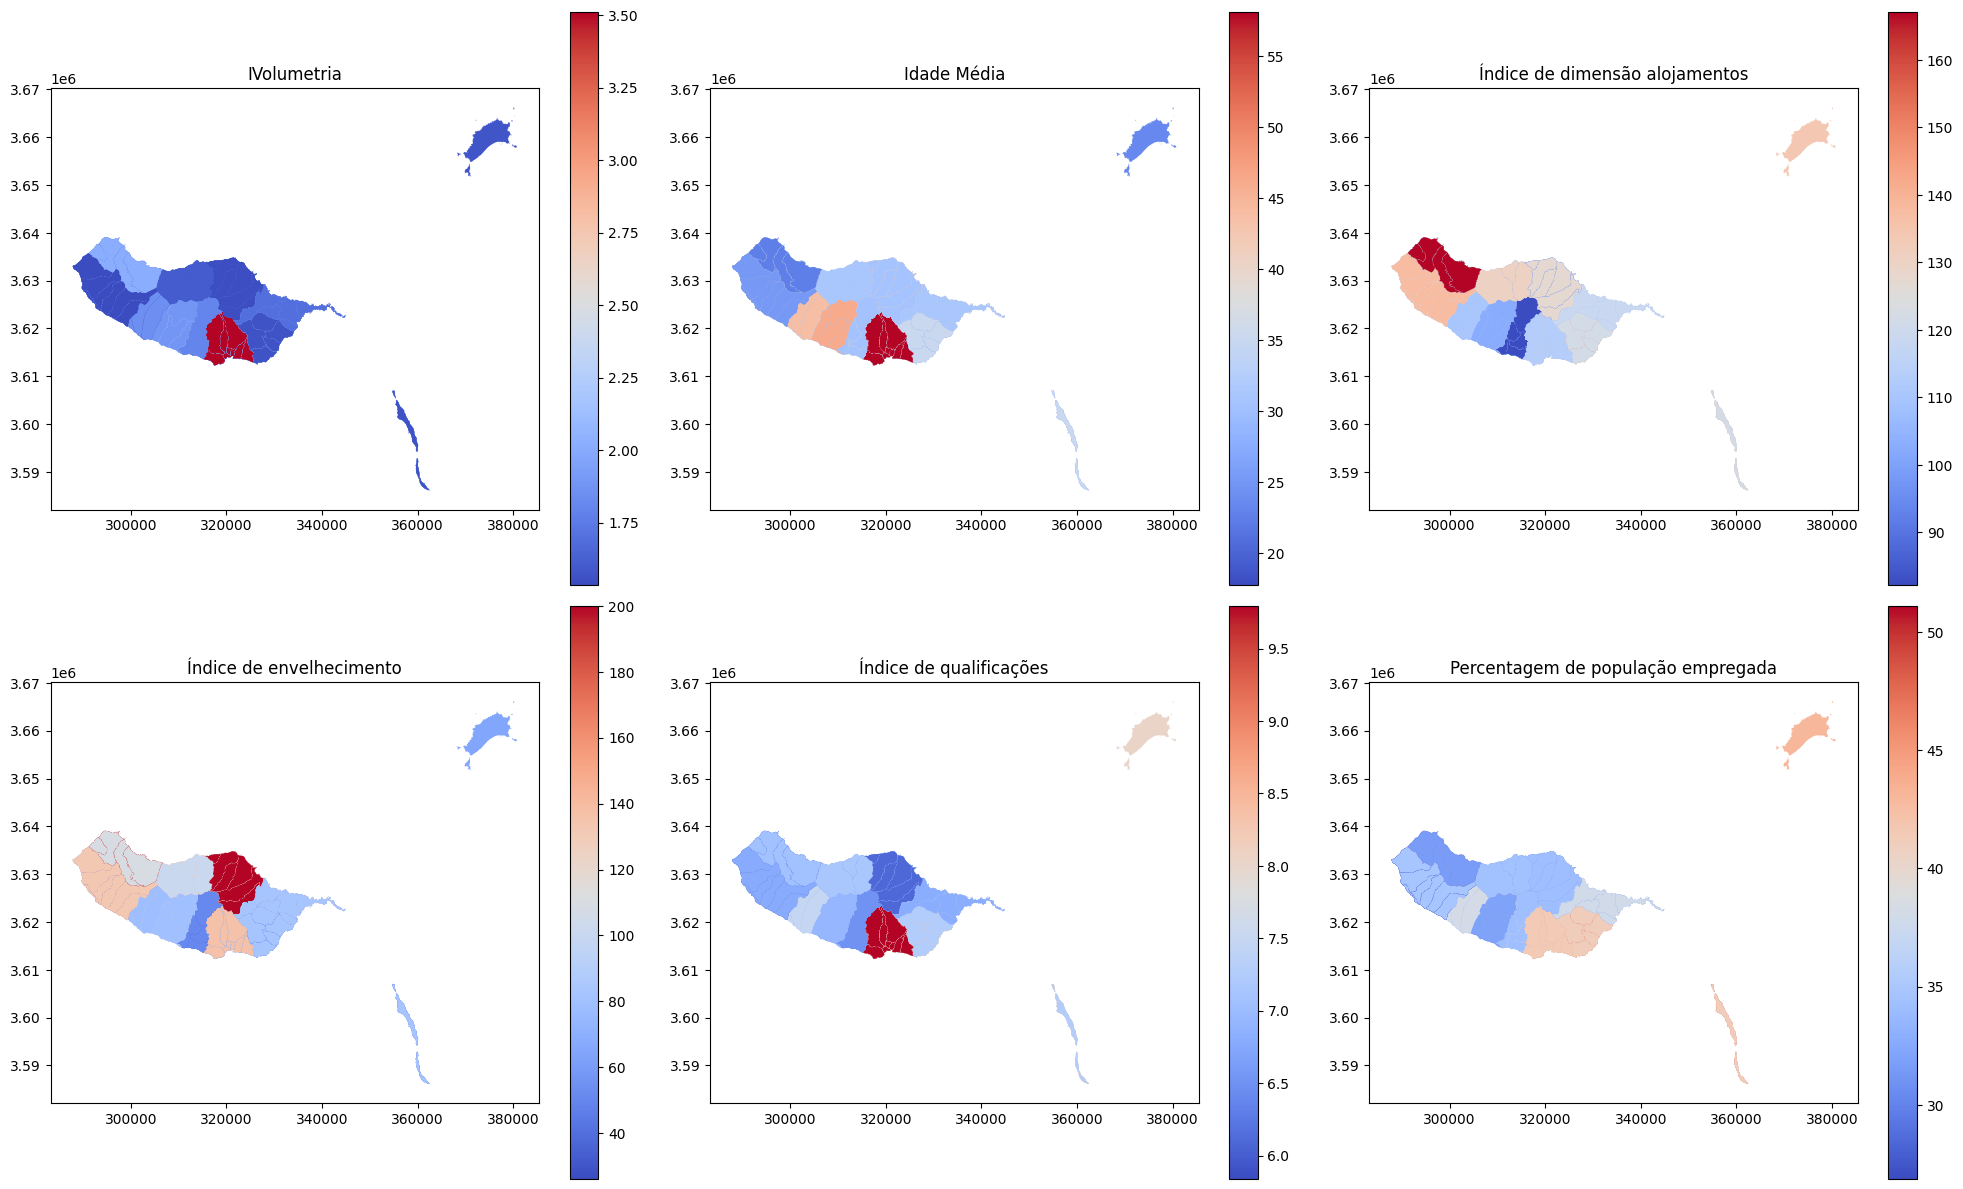

In [ ]:
# Função para criar e exibir um mapa
def plot_map(mapa_madeira, df_BGRI_s, column_name, title, ax):
    mapa_madeira_copy = mapa_madeira.copy()  # Crie uma cópia do DataFrame
    df_BGRI_s_copy = df_BGRI_s.copy()        # Crie uma cópia do DataFrame

    mapa_madeira_copy['Municipio'] = mapa_madeira_copy['Municipio'].str.upper().apply(unidecode)
    df_BGRI_s_copy['CONCELHO_DSG'] = df_BGRI_s_copy['CONCELHO_DSG'].str.upper().apply(unidecode)
    merged_data = mapa_madeira_copy.merge(df_BGRI_s_copy, left_on='Municipio', right_on='CONCELHO_DSG', how='left')

    merged_data.plot(column=column_name, cmap='coolwarm', legend=True, ax=ax)

    ax.set_title(title)

# Criar uma figura com duas linhas e três colunas de subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Criar e exibir os mapas nas linhas de subplots
plot_map(mapa_madeira, df_BGRI_s, 'IVolumetria', 'IVolumetria', axes[0, 0])
plot_map(mapa_madeira, df_BGRI_s, 'IMédia_edif', 'Idade Média', axes[0, 1])
plot_map(mapa_madeira, df_BGRI_s, 'dimensao_aloj', 'Índice de dimensão alojamentos', axes[0, 2])
plot_map(mapa_madeira, df_BGRI_s, 'ind_envelhecimento', 'Índice de envelhecimento', axes[1, 0])
plot_map(mapa_madeira, df_BGRI_s, 'ind_qualificações', 'Índice de qualificações', axes[1, 1])
plot_map(mapa_madeira, df_BGRI_s, 'pop_emp', 'Percentagem de população empregada', axes[1, 2])

# Ajustar o espaço entre os mapas
plt.tight_layout()

# Exibir os mapas em duas linhas
plt.show()

####**Mapa clustering e Dendrograma**

Nesta subsecação, procedemos à realização do dendrograma com os 6 indicadores.

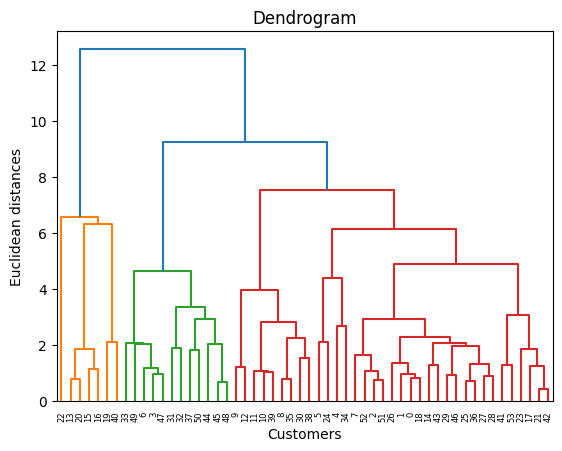

In [ ]:
# Dendrograma com os 6 indicadores
dendrogram = sch.dendrogram(sch.linkage(df_normalized[indicators_list], method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Estamos na presença de 3 clusters (fazendo um corte na distâcia euclidiana igual a 8).

Com ajuda da tabela elaborada na subsecção anterior, "Freguesias numeradas", podemos tirar as seguintes conclusões:


1.   O município 22, que corresponde à Sé (Funchal), é o mais dissimilar entre todas as freguesias.
2.   Os municípios 21, São Roque, e 42, Santa Cruz, são os mais similares entre si, uma vez que a distância euclidiana calculada entre estes municípios é a mais baixa.



Com estas informações, realizamos um mapa clustering de modo a visualizar de forma mais simplificada a proximidade geográfica entre as freguesias representadas por cada cluster.



/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


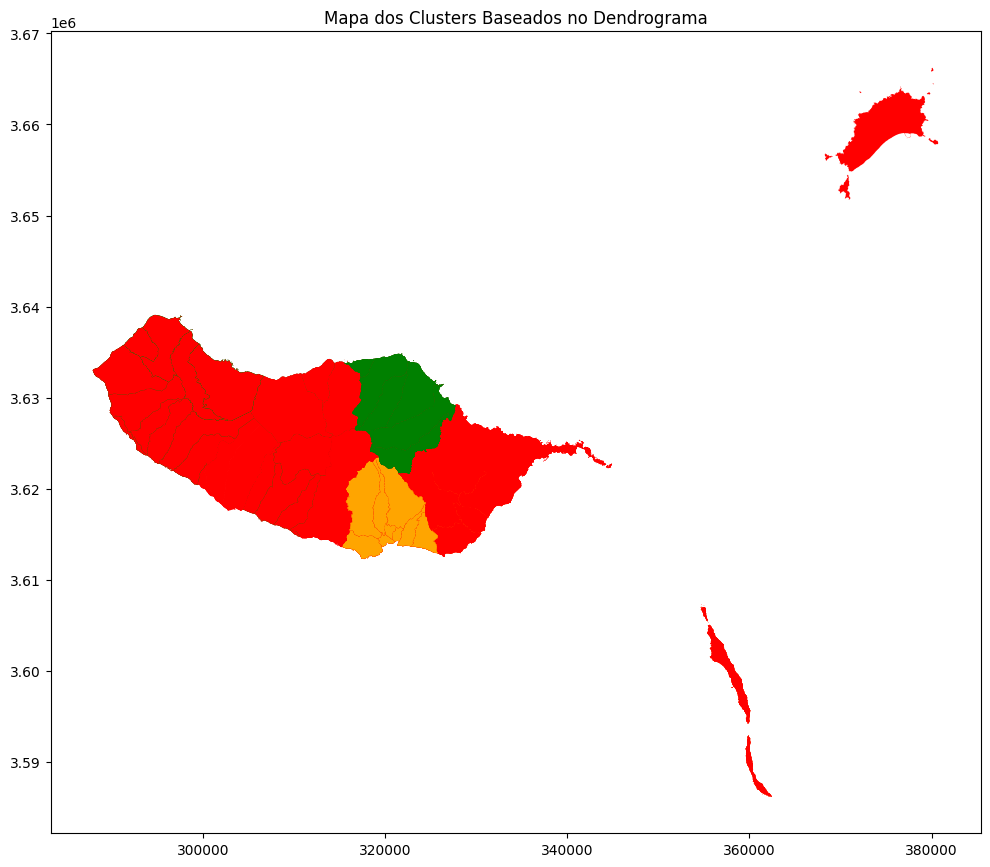

In [ ]:
# Definir o número de clusters com base em suas preferências
num_clusters = 3  # Escolha o número de clusters desejado

# Usar o método fcluster para atribuir rótulos de cluster a cada observação
from scipy.cluster.hierarchy import fcluster
df_normalized['cluster_label'] = fcluster(sch.linkage(df_normalized[indicators_list], method='ward'), t=num_clusters, criterion='maxclust')

# Padronizar os valores nas colunas para maiúsculas e remoção de acentos
mapa_madeira['Municipio'] = mapa_madeira['Municipio'].str.upper().apply(unidecode)
df_normalized['CONCELHO_DSG'] = df_normalized['CONCELHO_DSG'].str.upper().apply(unidecode)

# Combinar os DataFrames com base na coluna 'CONCELHO_DSG'
merged_data = mapa_madeira.merge(df_normalized, left_on='Municipio', right_on='CONCELHO_DSG', how='left')

# Definir as cores para os clusters (substitua pelas cores desejadas)
cluster_colors = ['orange', 'green', 'red']

# Criar um dicionário que mapeia rótulos de cluster para cores
cluster_color_dict = {1: cluster_colors[0], 2: cluster_colors[1], 3: cluster_colors[2]}

# Adicionar uma nova coluna 'cluster_color' com as cores correspondentes aos rótulos de cluster
merged_data['cluster_color'] = merged_data['cluster_label'].map(cluster_color_dict)

# Ajustar o tamanho da figura
fig, ax = plt.subplots(figsize=(12, 12))

# Meter o mapa colorido com base nas cores dos clusters
merged_data.plot(color=merged_data['cluster_color'], legend=False, ax=ax)

# Adicionar um título ao mapa
plt.title('Mapa dos Clusters Baseados no Dendrograma')

# Mostrar o mapa
plt.show()

###**Clustering Hierárquico - Dendrograma: Fatores**

####**Mapas por fatores**

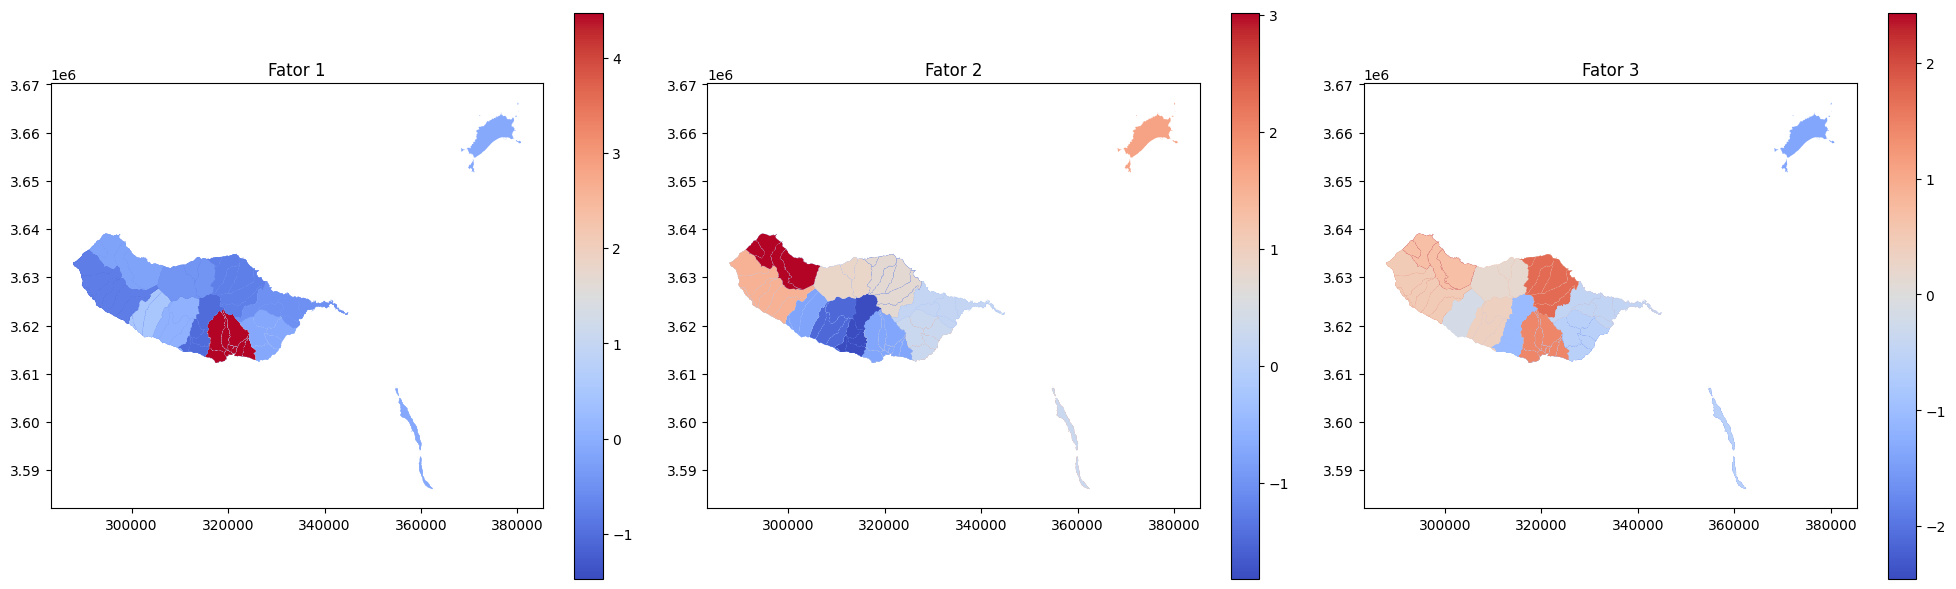

In [ ]:
# Função para criar e exibir um mapa
def plot_map(mapa_madeira, df_normalized, factor_name, title, ax):
    mapa_madeira_copy = mapa_madeira.copy()  # Crie uma cópia do DataFrame
    df_normalized_copy = df_normalized.copy()  # Crie uma cópia do DataFrame

    mapa_madeira_copy['Municipio'] = mapa_madeira_copy['Municipio'].str.upper().apply(unidecode)
    df_normalized_copy['CONCELHO_DSG'] = df_normalized_copy['CONCELHO_DSG'].str.upper().apply(unidecode)
    merged_data = mapa_madeira_copy.merge(df_normalized_copy, left_on='Municipio', right_on='CONCELHO_DSG', how='left')

    merged_data.plot(column=factor_name, cmap='coolwarm', legend=True, ax=ax)

    ax.set_title(title)

# Criar uma figura com uma linha e três colunas de subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Criar e exibir os mapas para cada fator
plot_map(mapa_madeira, df_normalized, 'factor_1', 'Fator 1', axes[0])
plot_map(mapa_madeira, df_normalized, 'factor_2', 'Fator 2', axes[1])
plot_map(mapa_madeira, df_normalized, 'factor_3', 'Fator 3', axes[2])

# Ajustar o espaço entre os mapas
plt.tight_layout()

# Exibir os mapas em uma linha
plt.show()

####**Mapa clustering e Dendrograma**

Nesta subsecação, procedemos à realização do dendrograma com os 3 fatores.

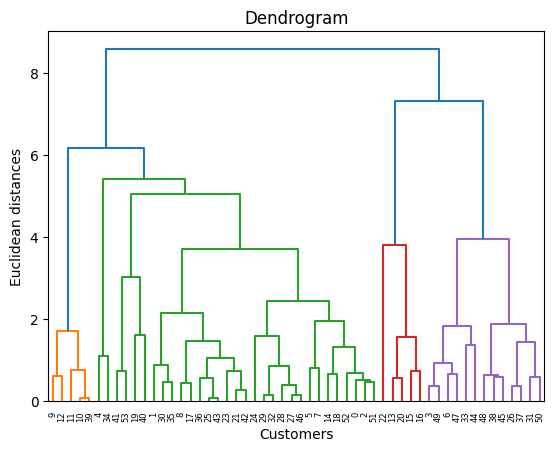

In [ ]:
#dendogram using the 3 factors indicators
dendrogram = sch.dendrogram(sch.linkage(df_normalized[factor_list], method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Neste caso, é importante notar a presença de 4 clusters, fazendo um corte na distância euclidiana igual a 5,5.

O município 22 (Funchal (Sé)) é o mais dissimilar de entre os outros munícipios.

Os municípios 10 (Estreito de Câmara de Lobos) e 39 (Camacha), e 25 (Machico) e 43 (Santo António da Serra) são os mais similares entre si.


Uma vez mais, realizamos um mapa clustering de modo a visualizar de forma mais simplificada a proximidade geográfica entre as freguesias representadas por cada cluster.

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


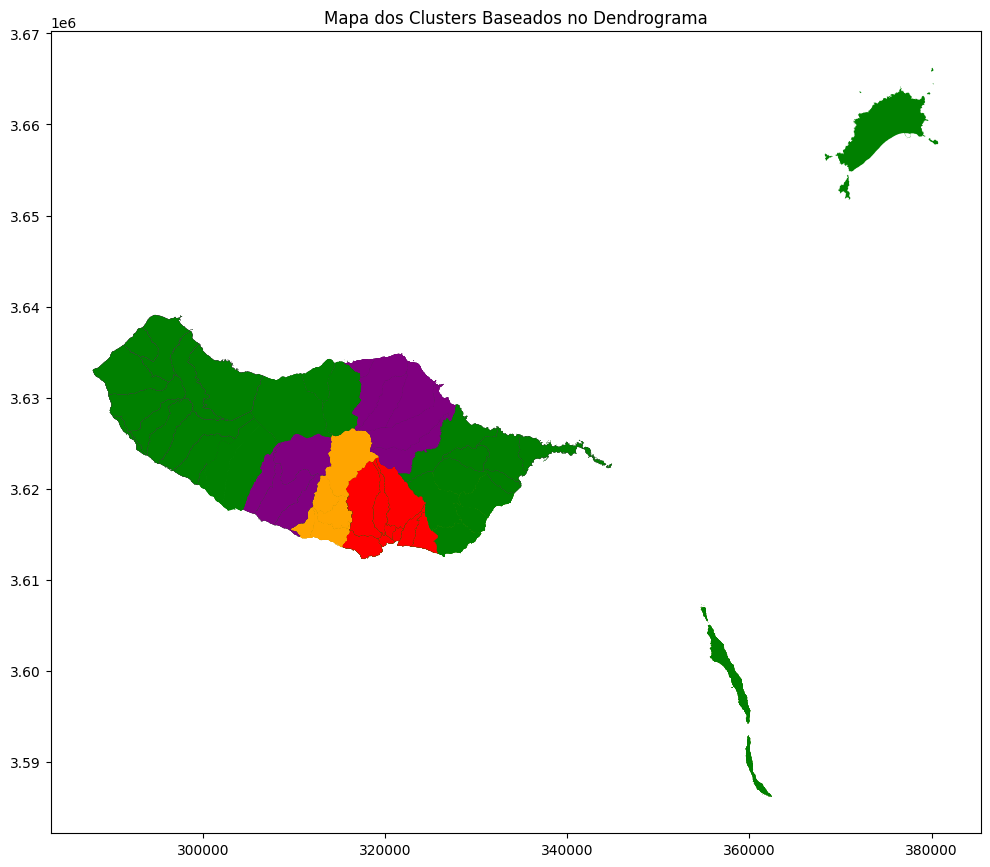

In [ ]:
# Definir o número de clusters com base em suas preferências
num_clusters = 4  # Escolha o número de clusters desejado

# Usar o método fcluster para atribuir rótulos de cluster a cada observação
from scipy.cluster.hierarchy import fcluster
df_normalized['cluster_label'] = fcluster(sch.linkage(df_normalized[factor_list], method='ward'), t=num_clusters, criterion='maxclust')

# Padronizar os valores nas colunas para maiúsculas e remoção de acentos
mapa_madeira['Municipio'] = mapa_madeira['Municipio'].str.upper().apply(unidecode)
df_normalized['CONCELHO_DSG'] = df_normalized['CONCELHO_DSG'].str.upper().apply(unidecode)

# Combinar os DataFrames com base na coluna 'CONCELHO_DSG'
merged_data = mapa_madeira.merge(df_normalized, left_on='Municipio', right_on='CONCELHO_DSG', how='left')

# Definir as cores para os clusters (substitua pelas cores desejadas)
cluster_colors = ['orange', 'green', 'red', 'purple']

# Criar um dicionário que mapeia rótulos de cluster para cores
cluster_color_dict = {1: cluster_colors[0], 2: cluster_colors[1], 3: cluster_colors[2], 4: cluster_colors[3]}

# Adicionar uma nova coluna 'cluster_color' com as cores correspondentes aos rótulos de cluster
merged_data['cluster_color'] = merged_data['cluster_label'].map(cluster_color_dict)

# Ajustar o tamanho da figura
fig, ax = plt.subplots(figsize=(12, 12))

# Meter o mapa colorido com base nas cores dos clusters
merged_data.plot(color=merged_data['cluster_color'], legend=False, ax=ax)

# Adicionar um título ao mapa
plt.title('Mapa dos Clusters Baseados no Dendrograma')

# Mostrar o mapa
plt.show()

##**MODELO DE REGRESSÃO**:

Neste exercício, considerando como variável dependente a População Total, vamos começar por construir um modelo de regressão explicado pelos 6 indicadores iniciais e posteriormente pelas componentes principais obtidas na resolução do Exercício 1.

A regressão é uma técnica estatística que nos permite entender como é que uma variável dependente é afetada por uma ou mais variáveis independentes. A regressão divide-se em dois ramos, regressão linear simples e regressão linear múltipla. Para este exercício, como temos mais que uma variável independente, estamos perante regressão linear múltipla.

###**População com os indicadores**

Inicialmente, vamos começar por selecionar as variáveis independentes e a variável dependente, e adicionamos uma constante ao conjunto das variáveis independentes para representar a interceção e, por fim, definimos o método de regressão, que será, o Método dos Mínimos Quadrados.

In [ ]:
# Selecionar variáveis independentes
a1 = df_normalized[['IVolumetria',
                   'IMédia_edif',
                   'dimensao_aloj',
                   'ind_envelhecimento',
                   "ind_qualificações",
                   'pop_emp']]

# Selecionar variável dependente
b1 = df_BGRI_s['N_INDIVIDUOS_RESIDENT']

In [ ]:
# Add a constant to the independent variable set to represent the intercept
# Adicionar uma constante ao conjunto da variável independente para representar a interseção
a1 = sm.add_constant(a1)

# Fit the model
model1 = sm.OLS(b1, a1).fit()

# Print out the statistics
print(model1.summary())


                              OLS Regression Results                             
Dep. Variable:     N_INDIVIDUOS_RESIDENT   R-squared:                       0.527
Model:                               OLS   Adj. R-squared:                  0.467
Method:                    Least Squares   F-statistic:                     8.727
Date:                   Sun, 05 Nov 2023   Prob (F-statistic):           2.14e-06
Time:                           17:46:49   Log-Likelihood:                -527.98
No. Observations:                     54   AIC:                             1070.
Df Residuals:                         47   BIC:                             1084.
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const 

Da análise do modelo de regressão, podemos deduzir a equação que identifica a melhor linha que se ajusta aos valores observados. Essa equação é dada por

$$\text{N_INDIVIDUOS_RESIDENT}_i = 4958.9815 + 602.3805 \times \text{IVolumetria}_i - 340.5911 \times \text{IMédia_edif}_i - 359.3364 \times \text{dimensao_aloj}_i - 1810.7855 \times \text{ind_envelhecimento}_i + 1057.5157 \times \text{ind_qualificações}_i + 2444.0843 \times \text{pop_emp}_i$$

O R-squared ou $R^2$ é o coeficiente de determinação que indica quanto a variação percentual da variável dependente pode ser explicada pela variável independente. Quanto mais próxima de 1, melhor será a regressão obtida. Ora, como obtivemos um $R^2 = 0.527$, podemos afirmar que a variação de $52.7 \%$ da variável População Total pode ser explicada pelas variávies independentes.

Em análises de regressão linear, o F test é um teste que nos ajuda na análise da correlação dos coeficientes, com uma hipótese nula de que o coeficiente de correlação das variáveis é 0. Como o p-value é igual a $2.14e-06$, leva-nos a rejeitar H0 a um nível de significância de $1\%$, $5\%$ e $10\%$.

O T test é um teste para o coeficiente de regressão, com a hipótese nula de que o coeficiente de regressão das variáveis independentes da população é igual a 0. Rejeitamos H0, para um nível de significância de $1\%$, $5\%$ e $10\%$ para as variáveis Índice de Volumetria, Idade Média de Edificado, Dimensão do Alojamento e Índice de Qualificação.

Para o Índice de Envelhecimento e para a População Empregada, rejeitamos H0 quando o nível de significância é igual a $5\%$ e $10\%$ e não rejeitamos a hipótese nula quando o nível de significância é igual a $1\%$.

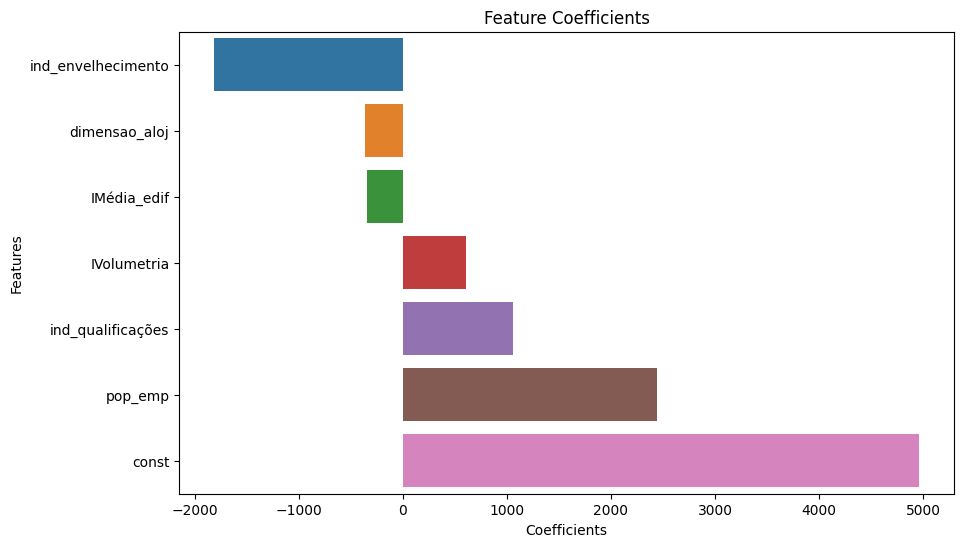

In [ ]:
coefficients1 = pd.DataFrame({'Features': a1.columns, 'Coefficients': model1.params})
coefficients1 = coefficients1.sort_values(by='Coefficients')

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficients', y='Features', data=coefficients1)
plt.title('Feature Coefficients')
plt.show()

O gráfico anterior é uma representação dos coeficientes das diferentes variáveis independentes e a orientação de cada barra indica a direção e magnitude da influência que cada variável tem no modelo de regressão. Assim, por visualização gráfica, podemos concluir que a variável População Empregada é a que tem maior influência no modelo e a variável Índice de Envelhecimento é a que tem menor influência no modelo.


Procedemos ao cálculo dos resíduos para verificar as discrepâncias entre os pontos de dados reais e as estimativas feitas pelo modelo e realizamos um gráfico que confronta o valor dos resíduos com os valores estimados.


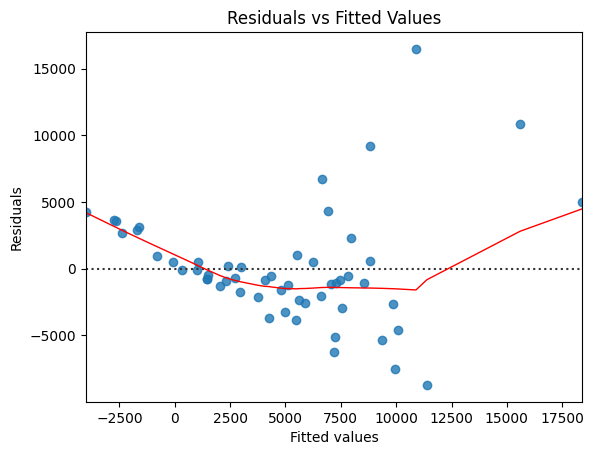

In [ ]:
# Calculate residuals
residuals1 = b1 - model1.predict(a1)

# Create a seaborn residual plot
sns.residplot(x=model1.predict(a1), y=residuals1, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

Pela análise do gráfico resíduos vs valores estimados, verificamos que os resíduos não estão distribuídos aleatoriamente em torno de 0, o que também se justifica pelo facto de a linha vermelha não estar próxima ao eixo horizontal. Além disso, a linha apresenta um padrão decrescente até certo ponto e depois começa a ser crescente, o que nos indica que o modelo não está a reter de forma adequada a relação entre as variáveis independentes e a variável dependente. Claramente, há presença de outliers.


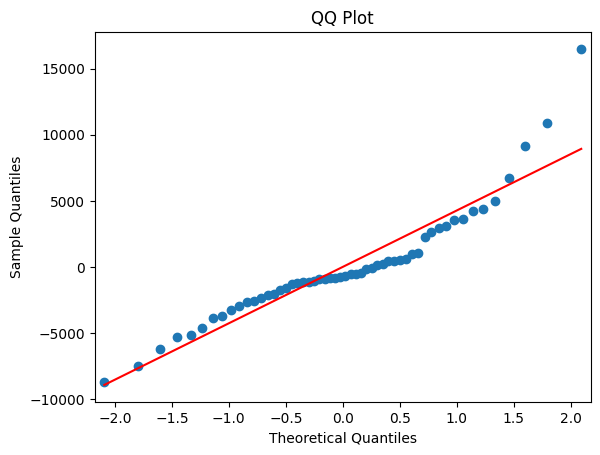

In [ ]:
# QQ_Plot
sm.qqplot(residuals1, line='s')
plt.title('QQ Plot')
plt.show()


O QQ Plot serve para avaliar se os resíduos do modelo seguem uma distribuição normal. Assim, pela análise gráfica, podemos afirmar que os pontos não seguem a linha que representa a distribuição normal, pelo que os resíduos não são normalmente distribuídos.

###**População com os fatores**

Inicialmente, vamos começar por selecionar as variáveis independentes e a variável dependente, e adicionamos uma constante ao conjunto das variáveis independentes para representar a interceção e, por fim, definimos o método de regressão, que será, o Método dos Mínimos Quadrados.

In [ ]:
#Select independent variables
a2 = df_normalized[['factor_1', 'factor_2', 'factor_3']]

#Select dependent variable
b2 = df_BGRI_s['N_INDIVIDUOS_RESIDENT']

In [ ]:
#Add a constant to the independent variable set to represent the intercept
a2 = sm.add_constant(a2)

#Fit the model
model2 = sm.OLS(b2, a2).fit()

#Print out the statistics
print(model2.summary())

                              OLS Regression Results                             
Dep. Variable:     N_INDIVIDUOS_RESIDENT   R-squared:                       0.522
Model:                               OLS   Adj. R-squared:                  0.494
Method:                    Least Squares   F-statistic:                     18.23
Date:                   Sun, 05 Nov 2023   Prob (F-statistic):           4.00e-08
Time:                           18:21:29   Log-Likelihood:                -528.24
No. Observations:                     54   AIC:                             1064.
Df Residuals:                         50   BIC:                             1072.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4958.9815 

Da análise do modelo de regressão, podemos deduzir a equação que identifica a melhor linha que se ajusta aos valores observados. Essa equação é dada por

$$\text{N_INDIVIDUOS_RESIDENT}_i = 4958.9815 + 2693.5905 \times \text{factor_1}_i + 104.4725  \times \text{factor_2}_i -3582.2560 \times \text{factor_3}_i$$

Uma vez que $R^2 = 0.522$, podemos afirmar que a variação de $52.2 \%$ da variável População Total pode ser explicada pelas variávies independentes.

O F test tem como hipótese nula que o coeficiente de correlação das variáveis é 0. Como o p-value é igual a $4.00e-08$, leva-nos a rejeitar H0 a um nível de significância de $1\%$, $5\%$ e $10\%$

Em relação ao T test (com a hipótese nula de que o coeficiente de regressão das variáveis independentes da população é igual a 0), é interessante notar que, para o factor_2, rejeitamos H0 para um nível de significância de $1\%$, $5\%$ e $10\%$, ao contrário dos outros dois fatores, factor_1 e factor_3, que não rejeitamos H0 para nenhum nível de significância.

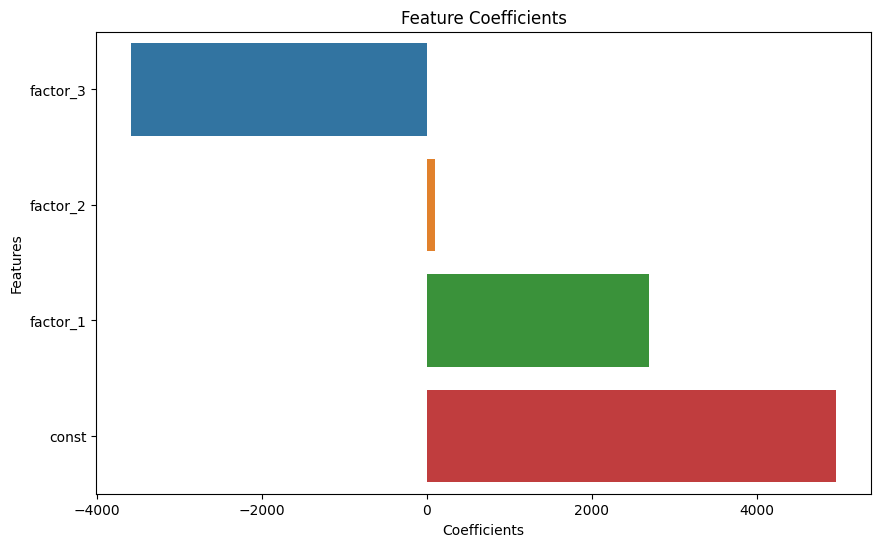

In [ ]:
coefficients2 = pd.DataFrame({'Features': a2.columns, 'Coefficients': model2.params})
coefficients2 = coefficients2.sort_values(by='Coefficients')

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficients', y='Features', data=coefficients2)
plt.title('Feature Coefficients')
plt.show()

O gráfico anterior é uma representação dos coeficientes das diferentes variáveis independentes e a orientação de cada barra, indica a direção e magnitude da influência que cada variável tem no modelo de regressão. Assim, por visualização gráfica, podemos concluir que a variável "factor_1" é a que tem maior influência no modelo e a variável "factor_3" é a que tem menor influência no modelo.


Procedemos ao cálculo dos resíduos para verificar as discrepâncias entre os pontos de dados reais e as estimativas feitas pelo modelo e realizamos um gráfico onde que confronta o valor dos resíduos com os valores estimados.

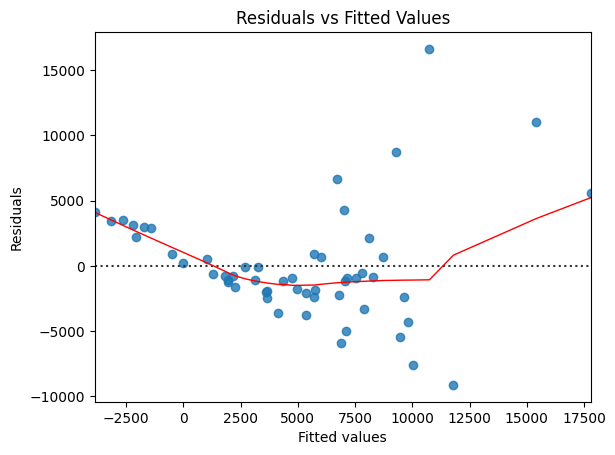

In [ ]:
#Calculate residuals
residuals2 = b2 - model2.predict(a2)

#Create a seaborn residual plot
sns.residplot(x=model2.predict(a2), y=residuals2, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

Pela análise do gráfico resíduos vs valores estimados, verificamos que os resíduos não estão distribuídos aleatoriamente em torno de 0, o que também se justifica pelo facto de a linha vermelha não estar próxima ao eixo horizontal. Além disso, a linha apresenta um padrão decrescente até certo ponto e depois começa a ser crescente, o que nos indica que o modelo não está a reter de forma adequada a relação entre as variáveis independentes e a variável dependente. Claramente, há presença de outliers.

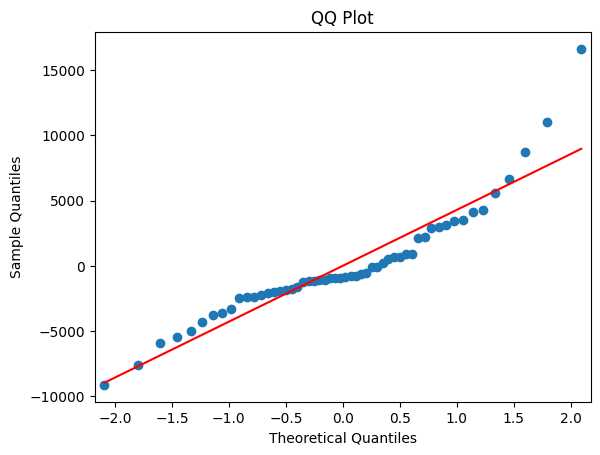

In [ ]:
sm.qqplot(residuals2, line='s')
plt.title('QQ Plot')
plt.show()

O QQ Plot serve para avaliar se os resíduos do modelo seguem uma distribuição normal. Assim, pela análise gráfica, podemos afirmar que os pontos não seguem a linha que representa a distribuição normal, pelo que os resíduos não são normalmente distribuídos.